In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df=pd.read_csv('MLWeedCropTrain.csv', sep=',',header=None)
#input
data=df.values[:,0:13]
labels=df.values[:,13]
#separate data and labels
pca = PCA(); pca.fit(data)
#define pca class and fit the data
data_pca = pca.transform(data)
#pca transformation
print(data_pca.shape)

(1000, 13)


In [2]:
#pca.components_

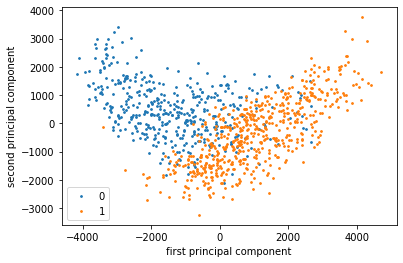

In [3]:
#%matplotlib notebook
%matplotlib inline
#%matplotlib auto

fig = plt.figure()
plt.scatter(data_pca[labels == 0, 0], data_pca[labels == 0, 1],s=3,label='0')
plt.scatter(data_pca[labels == 1, 0], data_pca[labels == 1, 1],s=3,label='1')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.legend()
plt.savefig('Assignment6Question1Plot2.pdf')

In [4]:
print(pca.explained_variance_ratio_)
sum=0
sum_list=[]
for i in range(len(pca.explained_variance_ratio_)):
    sum=sum+pca.explained_variance_ratio_[i]
    sum_list.append(sum)
print(sum_list)

[6.52324185e-01 2.64445180e-01 4.64823465e-02 2.26590394e-02
 9.00833001e-03 2.96225104e-03 1.06610321e-03 6.10103544e-04
 2.37590050e-04 1.93309798e-04 6.52133523e-06 5.04007844e-06
 2.17665260e-10]
[0.6523241845986323, 0.9167693647289343, 0.9632517112618827, 0.9859107507083992, 0.9949190807198749, 0.9978813317627989, 0.9989474349760782, 0.9995575385204281, 0.9997951285705933, 0.9999884383686632, 0.999994959703896, 0.9999999997823346, 0.9999999999999998]


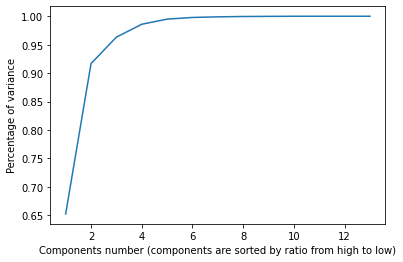

In [5]:
fig2 = plt.figure()
x=[1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.plot(x,sum_list)
plt.ylabel('Percentage of variance')
plt.xlabel('Components number (components are sorted by ratio from high to low)')
plt.savefig('Assignment6Question1Plot1.pdf')

In [25]:
kmeans = KMeans(n_clusters=2, init=data[:2],n_init=1).fit(data)
#We want 2 means thus n_clusters=2; initialization only use first two points that is data[:2]
pca.fit(data)
data_two_pca=pca.transform(kmeans.cluster_centers_)
#transform the 13 dimensions centroid to 2 dimensions.
print(data_two_pca)
print(data_two_pca[:,0])
print(data_two_pca[:,1])
clustering=kmeans.predict(data)
#print(clustering)
#maybe check the accuracy later :)

[[ 1.58392824e+03  1.23835519e+02 -2.70479519e+01 -1.62644227e+01
  -2.22008858e+01  7.26327869e+00  7.85359758e-01 -1.71450367e+00
   2.37003397e+00 -1.35536736e+00 -1.96176562e-01  1.28262890e-01
  -3.02900759e-04]
 [-1.41593585e+03 -1.10701448e+02  2.41792298e+01  1.45394082e+01
   1.98462464e+01 -6.49293095e+00 -7.02064026e-01  1.53266237e+00
  -2.11866673e+00  1.21161628e+00  1.75369957e-01 -1.14659250e-01
   2.70774920e-04]]
[ 1583.92823848 -1415.93584955]
[ 123.83551865 -110.70144849]


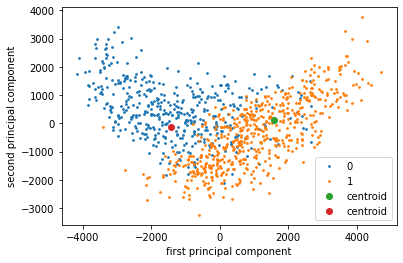

In [28]:
fig3 = plt.figure()
plt.scatter(data_pca[labels == 0, 0], data_pca[labels == 0, 1],s=3,label='0')
plt.scatter(data_pca[labels == 1, 0], data_pca[labels == 1, 1],s=3,label='1')
plt.scatter(data_two_pca[:,0][0], data_two_pca[:,1][0],label='centroid')
plt.scatter(data_two_pca[:,0][1], data_two_pca[:,1][1],label='centroid')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.legend()
plt.savefig('Assignment6Question1Plot3.pdf')